<a href="https://colab.research.google.com/github/9zxu/data-analysis/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imbalanced dataset
- [dataset info](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

- **time**:
Number of seconds elapsed between this transaction and the first transaction in the dataset

- **v1-v28**:
may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
- **Amount**:
is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- **Class**:
is the response variable and it takes value 1 in case of fraud and 0 otherwise.

at time `df['Time']` a person describe as `v1-v28` make a transaction with amount `df['Amount']` and this transaction is or not a fraud is labeled as `df['Class']`

In [13]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

Using Colab cache for faster access to the 'creditcardfraud' dataset.


### PCA
Principal Component Analysis (PCA) protects user identities and sensitive features by removing specific individual details (noise/redundancy) while preserving only aggregate global patterns (variance).

### The Metaphor: The Blurred Group Silhouette
Imagine a photographer taking a high-resolution photo of a crowd. Every face is distinct, showing unique features like eye color or scars (sensitive personal data).

- `Dimensionality Reduction` is like stepping far back and blurring the lens.

- The individuals are no longer recognizable, but the overall shape of the crowd—where they are clustered or how they are moving—remains clear.

### Mathematical Explanation

PCA transforms data into a new coordinate system where the most critical information is captured by the first few "Principal Components".


- `Linear Combination (Anonymization)`:
Mathematically, a principal component $Z$ is a linear combination of all original features $X$ :$Z=w_{1}X_{1}+w_{2}X_{2}+...+w_{n}X_{n}$
Because $Z$ is a mixture of many features, the original meaning of any single sensitive feature (like a specific "User ID" or "Medical Condition") is obscured. Without the original projection matrix $w$, it is mathematically difficult for an attacker to reverse-engineer $Z$ to find the exact value of $X_{1}$.

- `Truncation (Information Loss)`: PCA ranks directions by their eigenvalues (variance). Dimensionality reduction occurs by keeping only the top \(k\) components and discarding the rest.

- `Covariance Matrix Analysis`:
Privacy can be further enhanced by adding "noise" to the covariance matrix before computing eigenvectors, a technique known as `Differential Privacy (DP-PCA)`. This ensures that the presence or absence of a single individual in the dataset does not significantly change the resulting principal components.

In [14]:
import pandas as pd
df = pd.read_csv(path + "/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

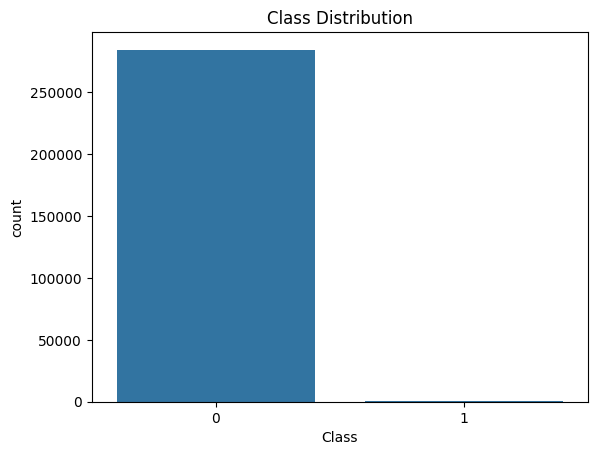

percantage


,count
Class,
0,99.827251
1,0.172749


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

print("percantage")
df['Class'].value_counts() / df['Class'].shape[0] * 100

distribution of transaction amount

correlation between class and amount: 0.005631753006768537
correlation between class and time: -0.012322570929245644


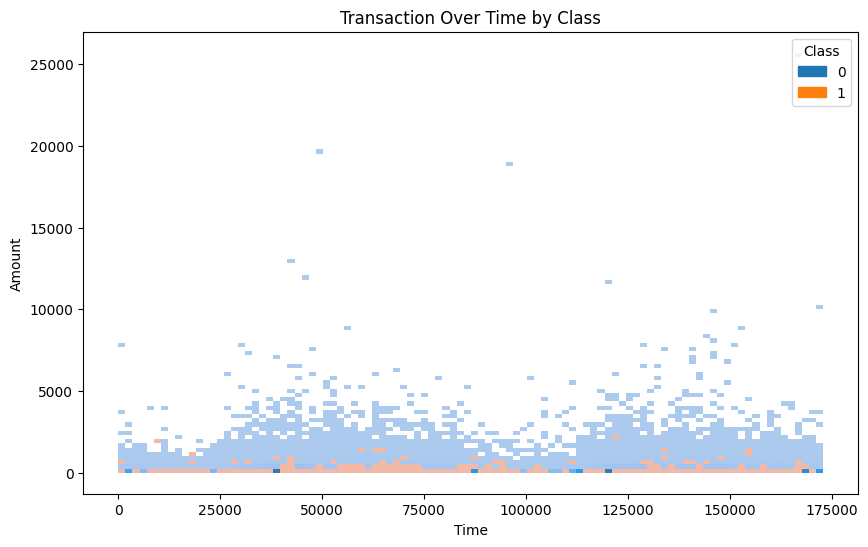

In [17]:
print("correlation between class and amount:", df['Class'].corr(df['Amount']))
print("correlation between class and time:", df['Class'].corr(df['Time']))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', y='Amount', bins=100, cmap='viridis', hue='Class')
plt.title('Transaction Over Time by Class')
plt.show()

In [18]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


# Training

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

use `StratifiedKFold` to maintain the `0.17%` fraud ratio in each split

title_suffix:  Undersampling (Random)
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
 --- PLOTTING --- 


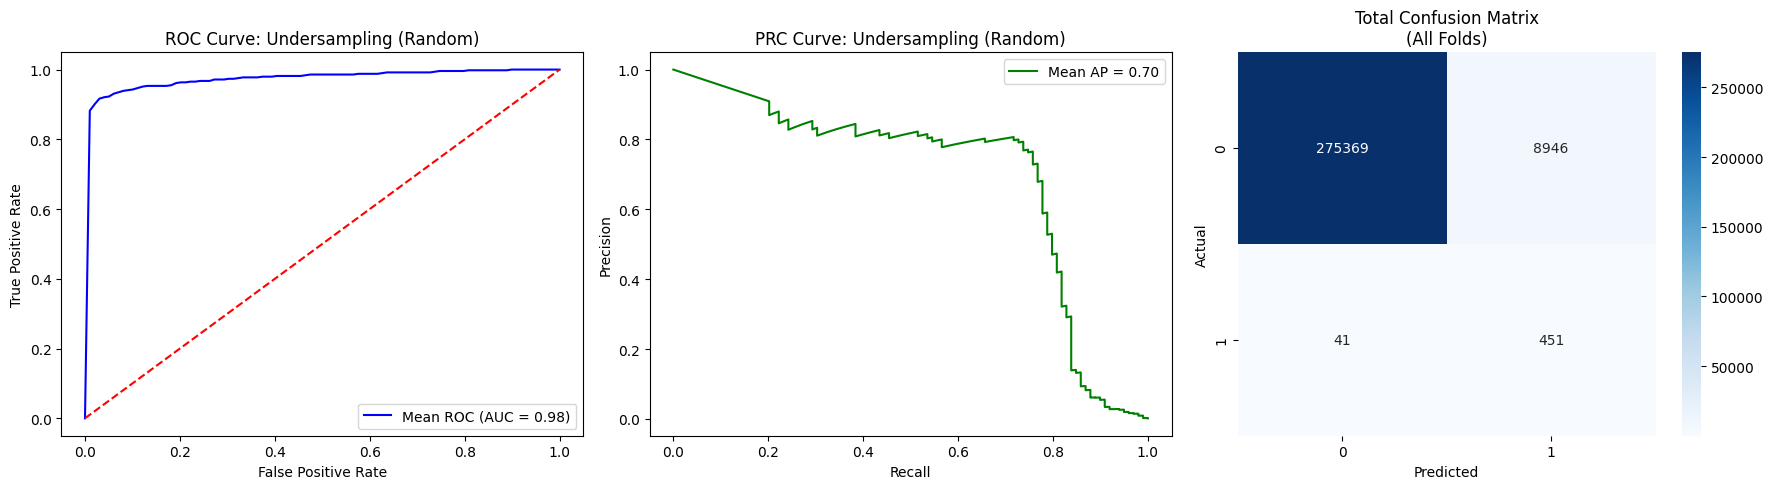

title_suffix:  Oversampling (SMOTE)
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
 --- PLOTTING --- 


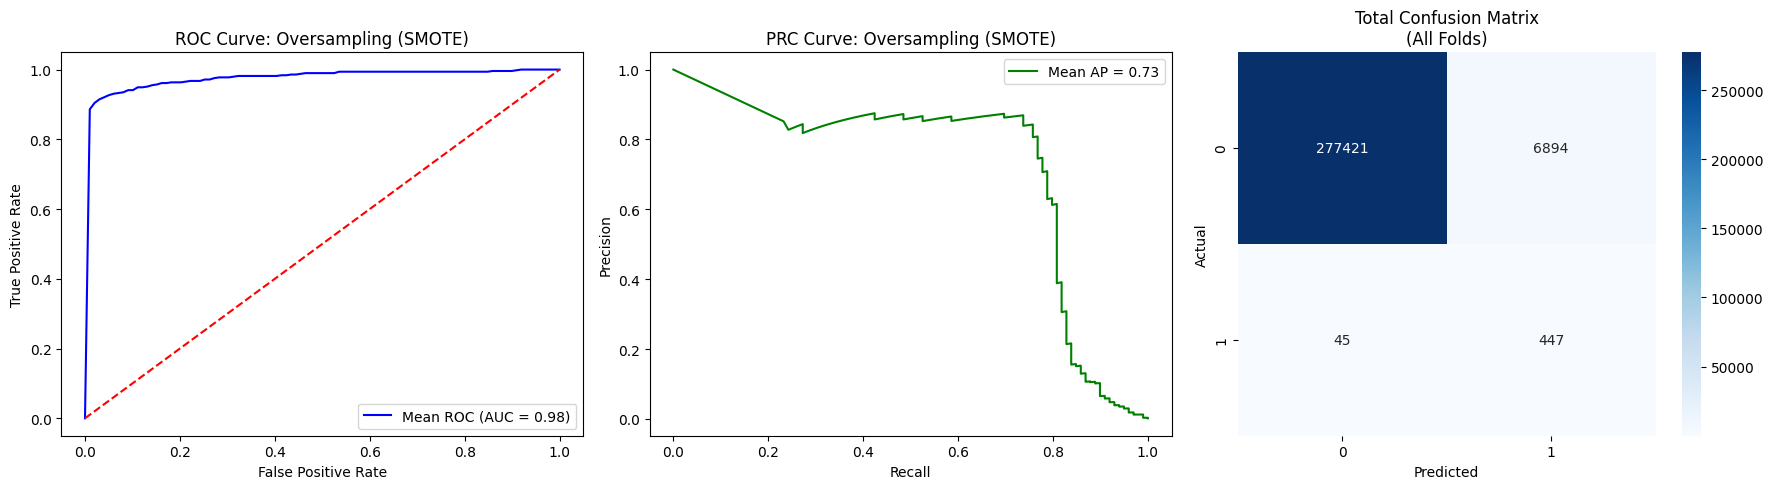

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (roc_curve, auc, precision_recall_curve,
                             average_precision_score, confusion_matrix, ConfusionMatrixDisplay)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

def evaluate_imbalance_method(X, y, method='oversample'):
    """
    method: 'oversample' (SMOTE), 'undersample' (RandomUnderSampler), or 'none'
    """
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Select Resampler
    if method == 'oversample':
        resampler = SMOTE(sampling_strategy='minority', random_state=42)
        title_suffix = "Oversampling (SMOTE)"
    elif method == 'undersample':
        resampler = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
        title_suffix = "Undersampling (Random)"
    else:
        resampler = None
        title_suffix = "No Resampling"

    print("title_suffix: ", title_suffix)

    # Define Pipeline to prevent leakage
    # 1. Scale -> 2. Resample (only on train) -> 3. Model
    steps = [('scaler', RobustScaler())]
    if resampler:
        steps.append(('resampler', resampler))
    steps.append(('classifier', LogisticRegression(max_iter=1000, solver='lbfgs')))

    pipeline = ImbPipeline(steps)

    # Metrics storage
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    all_precisions = []
    all_recalls = []
    all_aps = []

    conf_matrix_list = []

    plt.figure(figsize=(18, 5))

    for i, (train_idx, val_idx) in enumerate(skf.split(X, y)):

        print(f"Fold {i + 1}")

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        pipeline.fit(X_train, y_train)
        y_proba = pipeline.predict_proba(X_val)[:, 1]
        y_pred = pipeline.predict(X_val)

        # ROC Calculations
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

        # PRC Calculations
        precision, recall, _ = precision_recall_curve(y_val, y_proba)
        ap = average_precision_score(y_val, y_proba)
        all_aps.append(ap)
        all_precisions.append(precision)
        all_recalls.append(recall)

        # Confusion Matrix
        conf_matrix_list.append(confusion_matrix(y_val, y_pred))

    print(" --- PLOTTING --- ")

    # Plot ROC
    plt.subplot(1, 3, 1)
    plt.plot(mean_fpr, np.mean(tprs, axis=0), color='b', label=f'Mean ROC (AUC = {np.mean(aucs):.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'ROC Curve: {title_suffix}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # Plot PRC
    plt.subplot(1, 3, 2)
    # We plot the first fold for PRC visual
    plt.plot(all_recalls[0], all_precisions[0], color='g', label=f'Mean AP = {np.mean(all_aps):.2f}')
    plt.title(f'PRC Curve: {title_suffix}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Confusion Matrix (Sum of all folds)
    plt.subplot(1, 3, 3)
    total_cm = np.sum(conf_matrix_list, axis=0)
    sns.heatmap(total_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Total Confusion Matrix\n(All Folds)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.tight_layout()
    plt.show()

# Execute for both
evaluate_imbalance_method(X, y, method='undersample')
evaluate_imbalance_method(X, y, method='oversample')